In [2]:
""" https://keras.io/api/datasets/cifar10/ 
    https://keras.io/guides/sequential_model/ """

import sys
sys.path.append('F:/Code/MachineLearning/src/')
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


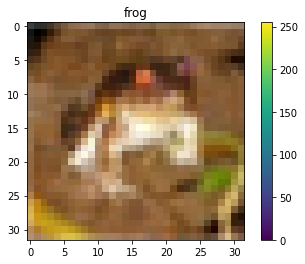

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
label_dict = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5: "dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

plt.imshow(x_train[0])
plt.title(label_dict[int(y_train[0])])
plt.colorbar()
plt.show()

In [5]:
# add another axis to x_train
#x_train = np.expand_dims(x_train,-1).astype(np.float32)
x_train = x_train.astype(np.float32)
#x_test = np.expand_dims(x_test,-1).astype(np.float32)
x_test = x_train.astype(np.float32)
print(x_train.shape)
# normalize pixel values to [0,1]
x_train /= 255
x_test /= 255

(50000, 32, 32, 3)


In [6]:
"""Functional (sequential) API"""
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Conv2D(32, (3,3), activation="relu"), #30x30x16
    keras.layers.Conv2D(32, (3,3), activation="relu"), #28x28x32
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling2D((3,3)), #9x9x32
    keras.layers.Conv2D(64, (3, 3), activation="relu"), #7x7x64
    keras.layers.Conv2D(64, (3, 3), activation="relu"), #5x5x64
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling2D((2, 2)),  #2x2x64
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.sparse_categorical_crossentropy, 
    metrics=["accuracy"],
)
model.build((50,32,32,3))
model.fit(x_train, y_train, batch_size=50, epochs=20)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0